# Анализ рынка заведений общественного питания Москвы

Решили открыть небольшое кафе в Москве. Гостей в кафе должны обслуживать роботы. Необходимо привлечь инвесторов.
Инвесторы готовы предоставить финансовую помощь на проект, но им важно понимать состояние дел на рынке общественного питания в Москве.

План:
- Исследуем соотношение видов объектов общественного питания по количеству;
- Исследуем количество сетевых и несетевых заведений;
- Посмотрим, для какого вида характерно сетевое распространение;
- Узнаем,много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест;
- Для каждого вида объекта общественного питания опишем среднее количество посадочных мест. Какой вид предоставляет в среднем самое большое количество посадочных мест;
- Выделим в отдельный столбец информацию об улице из столбца address;
- Построим график топ-10 улиц по количеству объектов общественного питания. Узнаем, в каких районах Москвы находятся эти улицы;
- Найдем число улиц с одним объектом общественного питания. Ответим на вопрос — в каких районах Москвы находятся эти улицы?;
- Посмотрим на распределение количества посадочных мест для улиц с большим количеством объектов общественного питания. Выявим закономерности.

**Описание данных**

- id — идентификатор объекта;
- object_name — название объекта общественного питания;
- chain — сетевой ресторан;
- object_type — тип объекта общественного питания;
- address — адрес;
- number — количество посадочных мест.

## Изучение данных из файла и подготовка к анализу

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
rest_data = pd.read_csv('/datasets/rest_data.csv') # чтение файла с данными и сохранение в rest_data
pd.set_option('display.max_columns',None) # отображаем все столбцы
rest_data.head(30) # получение первых 10 строк таблицы rest_data

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50
5,27429,СТОЛ. ПРИ ГОУ СОШ № 1051,нет,столовая,"город Москва, Абрамцевская улица, дом 15, корп...",240
6,148815,Брусника,да,кафе,"город Москва, переулок Сивцев Вражек, дом 6/2",10
7,20957,Буфет МТУСИ,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",90
8,20958,КПФ СЕМЬЯ-1,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",150
9,28858,Столовая МТУСИ,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",120


In [2]:
rest_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


In [3]:
display(rest_data.isna().sum()) # подсчёт пропусков

id             0
object_name    0
chain          0
object_type    0
address        0
number         0
dtype: int64

In [4]:
rest_data['object_name'] = rest_data['object_name'].str.lower() #приведем названия заведений к нижнему регистру
display(rest_data['object_name'].head(10)) #проверим выполнение действия

0                     сметана
1                      родник
2             кафе «академия»
3                  пиццетория
4      кафе «вишневая метель»
5    стол. при гоу сош № 1051
6                    брусника
7                 буфет мтуси
8                 кпф семья-1
9              столовая мтуси
Name: object_name, dtype: object

In [5]:
rest_data.isna().sum() # посмотрим пропуски в данных

id             0
object_name    0
chain          0
object_type    0
address        0
number         0
dtype: int64

In [6]:
display(rest_data.duplicated().sum())# подсчёт явных дубликатов

0

In [7]:
rest_data['object_name'].duplicated().sum() # подсчёт явных дубликатов в столбце object_name

5442

In [8]:
rest_data['address'].duplicated().sum() # подсчёт явных дубликатов в столбце address

6258

In [9]:
rest_data['number'].duplicated().sum() # подсчёт явных дубликатов в столбце number

15051

**Вывод**

Данные столбца object_name указаны в разном регистре, привела к нижнему.

Пропущенные данные не обнаружены.

Были выявлены дубликаты в столбцах:

- object_name - дубликаты в названиях заведений это возможно названия сетевых точек(не удаляем);
- address - дубликаты в адресе возможно связаны с тем, что в одном здании находится несколько разных заведений(не удаляем);
- number - дубликаты в количестве посадочных мест связаны с повторяющимся числом у различных заведений(не удаляем).

## Анализ данных

**Исследуем соотношение видов объектов общественного питания по количеству**

In [10]:
types = rest_data['object_type'].value_counts() #посчитаем объекты общественного питания
display(types)

кафе                                 6099
столовая                             2587
ресторан                             2285
предприятие быстрого обслуживания    1923
бар                                   856
буфет                                 585
кафетерий                             398
закусочная                            360
магазин (отдел кулинарии)             273
Name: object_type, dtype: int64

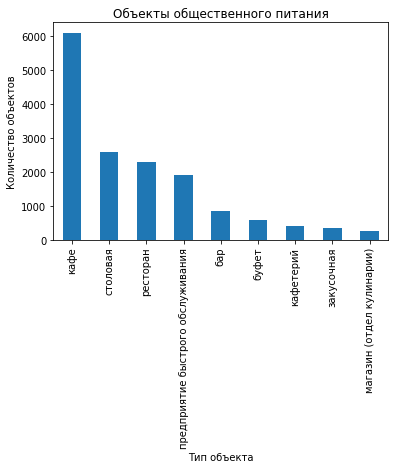

In [11]:
types.plot(kind = 'bar', title = 'Объекты общественного питания') #построим график видов объектов общественного питания по их количеству
plt.xlabel('Тип объекта')
plt.ylabel('Количество объектов')
plt.show()

**Вывод**

Больше всего кафе, столовых, ресторанов и предприятий быстрого обслуживания.

**Исследуем соотношение сетевых и несетевых заведений по количеству**

In [12]:
chain = rest_data['chain'].value_counts() #посчитаем сетевые и несетевые заведения
display(chain)

нет    12398
да      2968
Name: chain, dtype: int64

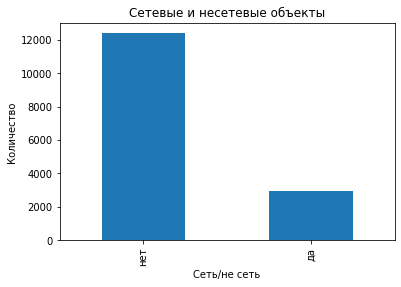

In [13]:
chain.plot(kind = 'bar', title = 'Сетевые и несетевые объекты') #построим график сетевых и несетевых заведений 
plt.xlabel('Сеть/не сеть')
plt.ylabel('Количество')
plt.show()

**Вывод**

Несетевые заведения лидируют.

**Посмотрим для какого вида объекта общественного питания характерно сетевое распространение**

In [14]:
chain_object = rest_data.query('chain == "да"') #выделяем сеть
chain_yes = chain_object.pivot_table(index='object_type', values='chain',aggfunc='count') # посмотрим какие виды объектов общественного питания имеют сетевое распространение 
chain_yes

,chain
object_type,
бар,37
буфет,11
закусочная,56
кафе,1396
кафетерий,52
магазин (отдел кулинарии),78
предприятие быстрого обслуживания,791
ресторан,544
столовая,3


In [15]:
chain_yes['chain%'] = chain_yes['chain'] /  types* 100 #найдем процент сетевых заведений от общего количества заведений
chain_yes['chain%'] = chain_yes['chain%'].apply(np.ceil)
chain_yes

,chain,chain%
object_type,,
бар,37,5.0
буфет,11,2.0
закусочная,56,16.0
кафе,1396,23.0
кафетерий,52,14.0
магазин (отдел кулинарии),78,29.0
предприятие быстрого обслуживания,791,42.0
ресторан,544,24.0
столовая,3,1.0


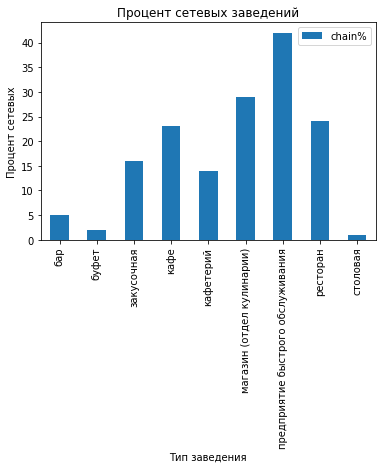

In [16]:
chain_yes = chain_yes.drop('chain', axis = 1) # удалим столбец chain
chain_yes.plot(kind = 'bar', title = 'Процент сетевых заведений') # посмотрим на процент сетевых заведений общественного питания
plt.xlabel('Тип заведения')
plt.ylabel('Процент сетевых')
plt.show()

**Вывод**

Наибольшую долю сетевых заведений имеют предприятия быстрого обслуживания - 42%. На втором месте магазины с отделом кулинарии -29%

**Узнаем много заведений с небольшим числом посадочных мест или мало заведений с большим количеством посадочных мест?**

In [17]:
many_or_few = chain_object.groupby('object_name').agg({'id' : 'nunique', 'number' : 'mean'}).round(2) # посмотрим на заведения с числом посадочных мест
many_or_few = many_or_few.sort_values(by = 'id', ascending = False).head(50)
many_or_few

,id,number
object_name,,
шоколадница,157,57.18
kfc,155,55.34
макдоналдс,151,87.12
бургер кинг,137,46.65
теремок,94,25.61
крошка картошка,90,21.86
домино'с пицца,90,18.34
милти,72,1.33
суши wok,72,6.71


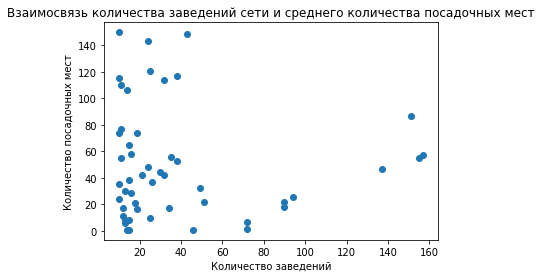

In [18]:
plt.scatter(x = "id", y = "number", data = many_or_few) #построим диаграмму количества заведений сети и среднего количества посадочных мест
plt.title('Взаимосвязь количества заведений сети и среднего количества посадочных мест')
plt.xlabel('Количество заведений')
plt.ylabel('Количество посадочных мест')
plt.show()

**Вывод**

Между количеством точек и количеством посадочных мест взаимосвязи нет. Есть сетевые заведения с малым количеством точек, но с большим количеством посадочных мест и сетевые заведения, где меньше 10 точек, но и малым количеством посадочных мест.

**Для каждого вида объекта общественного питания опишите среднее количество посадочных мест. Какой вид предоставляет в среднем самое большое количество посадочных мест?**

In [19]:
seat = rest_data.groupby('object_type').agg({'number' : 'mean'}).round(2) #посмотрим на среднее количество посадочных мест каждого вида объекта общественного питания
seat

,number
object_type,
бар,43.49
буфет,51.13
закусочная,7.61
кафе,39.72
кафетерий,9.12
магазин (отдел кулинарии),5.59
предприятие быстрого обслуживания,20.55
ресторан,96.83
столовая,130.25


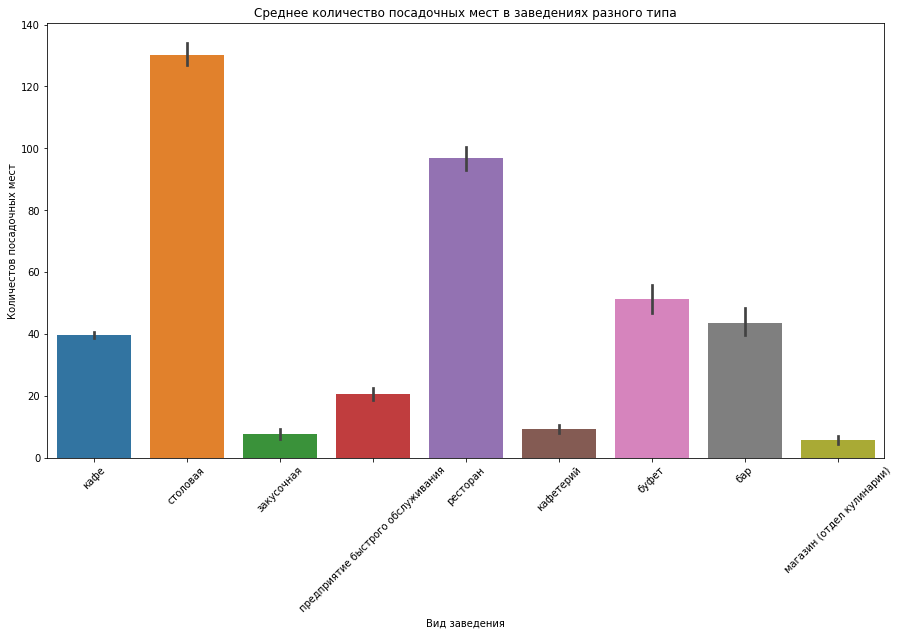

In [20]:
plt.figure(figsize = (15, 8))  #построим график среднего количества посадочных мест в заведениях разного типа
seat_number = sns.barplot(x="object_type", y="number", data = rest_data)
plt.xlabel('Вид заведения')
plt.ylabel('Количестов посадочных мест')
plt.title('Среднее количество посадочных мест в заведениях разного типа')
seat_number.set_xticklabels(seat_number.get_xticklabels(), rotation=45)
plt.show()

**Вывод**

По колличеству посадочных мест лидирует Столовые, на втором месте - Рестораны.

**Выделим в отдельный столбец информацию об улице из столбца address**

In [21]:
street_def = ['улица', 'проезд', 'бульвар', 'шоссе','переулоук'] #построим функцию, чтобы выделить улицу в отдельный столбец из столбца address

def get_street(row):
    for e in row.split(','):
        for i in street_def:
            if i in e.lower():
                return e
rest_data['street'] = rest_data['address'].apply(get_street)
rest_data['street'] = rest_data['street'].str.strip()
rest_data.head()

,id,object_name,chain,object_type,address,number,street
0,151635,сметана,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова
1,77874,родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина
2,24309,кафе «академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,Абельмановская улица
3,21894,пиццетория,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,Абрамцевская улица
4,119365,кафе «вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,Абрамцевская улица


**Узнаем, в каких районах Москвы находятся эти улицы**

In [22]:
street = rest_data.groupby('street')['id'].agg('count').sort_values(ascending = False).reset_index().head(10) # сгруппируем данные с улицами
street

,street,id
0,Профсоюзная улица,183
1,Варшавское шоссе,165
2,Каширское шоссе,112
3,Кировоградская улица,110
4,Ходынский бульвар,102
5,Ленинградское шоссе,100
6,Дмитровское шоссе,100
7,улица Новый Арбат,92
8,улица Ленинская Слобода,89
9,улица Сущёвский Вал,86


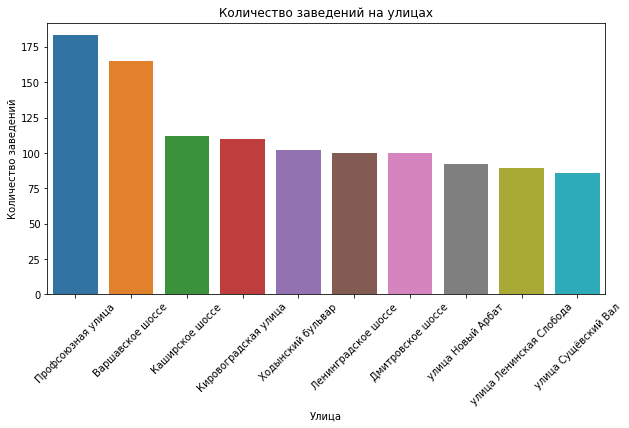

In [23]:
plt.figure(figsize = (10, 5))
street_st = sns.barplot(x="street", y="id", data = street)
plt.xlabel('Улица')
plt.ylabel('Количество заведений')
plt.title('Количество заведений на улицах')
street_st.set_xticklabels(street_st.get_xticklabels(), rotation=45)
plt.show()

In [24]:
moscow_streets = pd.read_csv('https://frs.noosphere.ru/xmlui/bitstream/handle/20.500.11925/714058/mosgaz-streets.csv') #подгружаем внешний источник данных с районами Москвы
moscow_streets = moscow_streets.rename (columns= {'streetname': 'street'}) #переименуем столбец
moscow_streets

,street,areaid,okrug,area
0,Выставочный переулок,17,ЦАО,Пресненский район
1,улица Гашека,17,ЦАО,Пресненский район
2,Большая Никитская улица,17,ЦАО,Пресненский район
3,Глубокий переулок,17,ЦАО,Пресненский район
4,Большой Гнездниковский переулок,17,ЦАО,Пресненский район
...,...,...,...,...
4393,Вознесенский проезд,17,ЦАО,Пресненский район
4394,Волков переулок,17,ЦАО,Пресненский район
4395,Поварская улица,17,ЦАО,Пресненский район
4396,Кудринская площадь,17,ЦАО,Пресненский район


In [25]:
area_street = street.merge(moscow_streets,on='street', how='left') #объединяем таблицы
area_street

,street,id,areaid,okrug,area
0,Профсоюзная улица,183,123,ЮЗАО,Академический район
1,Профсоюзная улица,183,132,ЮЗАО,Район Черемушки
2,Профсоюзная улица,183,134,ЮЗАО,Район Ясенево
3,Профсоюзная улица,183,126,ЮЗАО,Район Коньково
4,Профсоюзная улица,183,129,ЮЗАО,Обручевский район
5,Профсоюзная улица,183,131,ЮЗАО,Район Теплый Стан
6,Варшавское шоссе,165,109,ЮАО,Район Чертаново Центральное
7,Варшавское шоссе,165,108,ЮАО,Район Чертаново Северное
8,Варшавское шоссе,165,110,ЮАО,Район Чертаново Южное
9,Варшавское шоссе,165,99,ЮАО,Донской район


**Вывод**

Проспекты и шоссе имеют большую протяженность на несколько административных окургов. Можно выделить Юго-Западный, Южный административный округ,муниципальный округ Чертаново и Северный административный округ.

**Найдем число улиц с одним объектом общественного питания**

In [26]:
one_object = (rest_data   #найдем улицы с одним объектом общественного пистания
    .pivot_table(index='street', values='id', aggfunc='count')
    .sort_values(by='id', ascending=False).reset_index()
    )
one_object.columns=['street','count_object']
one_object=one_object[one_object['count_object']==1]
one_object

,street,count_object
1102,2-я Гражданская улица,1
1103,1-й Краснокурсантский проезд,1
1104,1-й Курьяновский проезд,1
1105,2-й Кабельный проезд,1
1106,улица Лефортовский Вал,1
...,...,...
1461,Большая Юшуньская улица,1
1462,Боровая улица,1
1463,Боровский проезд,1
1464,Янтарный проезд,1


**Вывод**

Улиц с одним заведением общественного питания 364.

In [27]:
area_one_object = one_object.merge(moscow_streets,on='street', how='left') #объединяем таблицы
area_one_object.head(30)

,street,count_object,areaid,okrug,area
0,2-я Гражданская улица,1,22.0,ВАО,Район Богородское
1,1-й Краснокурсантский проезд,1,114.0,ЮВАО,Район Лефортово
2,1-й Курьяновский проезд,1,118.0,ЮВАО,Район Печатники
3,2-й Кабельный проезд,1,114.0,ЮВАО,Район Лефортово
4,улица Лефортовский Вал,1,114.0,ЮВАО,Район Лефортово
5,1-й Саратовский проезд,1,121.0,ЮВАО,Район Текстильщики
6,2-й Иртышский проезд,1,25.0,ВАО,Район Гольяново
7,3-я Железногорская улица,1,133.0,ЮЗАО,Район Южное Бутово
8,улица Новая Дорога,1,13.0,ЦАО,Басманный район
9,улица Фонвизина,1,74.0,СВАО,Бутырский район


In [28]:
area_one_object['area'].value_counts().head(20) #посмотрим на районы, где на улице одно заведение общественного питания

Район Марьина роща        15
Район Лефортово           11
Район Богородское          9
Нижегородский район        9
Таганский район            9
Район Сокольники           8
Район Южное Бутово         8
Можайский Район            8
Даниловский район          8
Район Внуково              8
Лосиноостровский район     7
Район Люблино              7
Район Соколиная Гора       7
Тимирязевский Район        6
Район Кунцево              6
Пресненский район          6
Район Солнцево             6
Донской район              6
Дмитровский район          6
Район Выхино-Жулебино      5
Name: area, dtype: int64

**Вывод**

Лидирующими можно выделить Район Марьина роща, Район Лефортово,Таганский район, Нижегородский район, Район Богородское.

**Посмотрим на распределение количества посадочных мест для улиц с большим количеством объектов общественного питания**

In [29]:
top_seats_ten = rest_data.groupby('street').agg({'id' : 'count', 'number' : 'mean'}).sort_values(by='id',ascending = False).round(2).head(10)
top_seats_ten  #посмотрим на распределение количества посадочных мест для улиц с большим количеством объектов общественного питания

,id,number
street,,
Профсоюзная улица,183,47.36
Варшавское шоссе,165,52.28
Каширское шоссе,112,55.10
Кировоградская улица,110,59.79
Ходынский бульвар,102,18.95
Ленинградское шоссе,100,44.68
Дмитровское шоссе,100,63.19
улица Новый Арбат,92,54.18
улица Ленинская Слобода,89,34.06


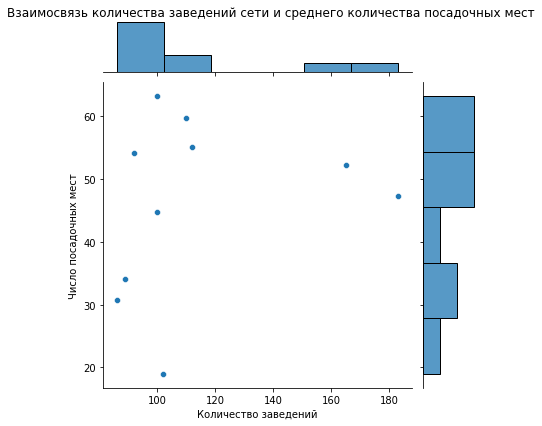

In [30]:
a = sns.jointplot(x = "id", y = "number", data = top_seats_ten)
a.set_axis_labels('Количество заведений', 'Число посадочных мест')
a.fig.suptitle('Взаимосвязь количества заведений сети и среднего количества посадочных мест')
a.fig.subplots_adjust(top=0.95)

**Вывод**

Однозначно сделать вывод не представляется возможным. Большое число посадочных мест есть как у заведений от 100 объектов общественного питания, так и свыше 200.

**Посмотрим на распределение количества посадочных мест для улиц всех объектов общественного питания**

In [31]:
top_seats = rest_data.groupby('street').agg({'id' : 'count', 'number' : 'mean'}).sort_values(by='id',ascending = False).round(2)
top_seats  #посмотрим на распределение количества посадочных мест для улиц всех объектов общественного питания

,id,number
street,,
Профсоюзная улица,183,47.36
Варшавское шоссе,165,52.28
Каширское шоссе,112,55.10
Кировоградская улица,110,59.79
Ходынский бульвар,102,18.95
...,...,...
Большая Юшуньская улица,1,55.00
Боровая улица,1,10.00
Боровский проезд,1,96.00


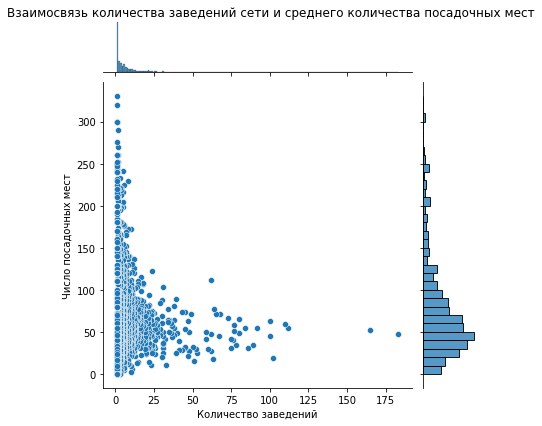

In [32]:
b = sns.jointplot(x = "id", y = "number", data = top_seats)
b.set_axis_labels('Количество заведений', 'Число посадочных мест')
b.fig.suptitle('Взаимосвязь количества заведений сети и среднего количества посадочных мест')
b.fig.subplots_adjust(top=0.95)

**Вывод**
Чем меньше количество заведений, тем больше число посадочных мест.

**Общий вывод**

Провели исследование соотношения видов объектов общественного питания по количеству. Больше всего в Москве представлены из объектов общественного питания- Кафе(из них сетевые только 23%). 
У Кафе среднее количество посадочных мест - 40. Так как планируем открыть небольшое кафе, то 40 посадочных мест вполне достаточно. 

При обработке данных были выявлены дубликаты в названиях заведений - это скорее всего дубликаты названия сетевых точек(не удаляем).И дубликаты в адресе местоположения - возможно связаны с тем, что в одном здании находится несколько разных заведений общественного питания.

Место расположение нового кафе лучше выбрать в центру города, где в основном население работает/проводит свое время. А также ввиду 1 заведения на улицу можно посмотреть Юго-Западный, Южный административный округ и муниципальный округ Чертаново.

Также можно рассмотреть заведение быстрого обслуживания (наибольшую долю сетевых заведений в Москве имеют предприятия быстрого обслуживания - 42%), где роботы смогут выполнять упрощенные функции - например еда на вынос или кофе с собой.

Презентация: https://disk.yandex.ru/i/ssEm6okVT2Dwug

